In [1]:
import torch
from my_nn_functions import trainNet, get_cifar_dataloaders_sizes, get_roc, plot_history
from torchsummary import summary

In [2]:
dataloaders, dataset_sizes, class_names = get_cifar_dataloaders_sizes()

Files already downloaded and verified


In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [4]:
from CNNint import CNNint

In [5]:
model = CNNint(10).to(device)
summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
            Conv2d-4           [-1, 32, 32, 32]           9,248
              ReLU-5           [-1, 32, 32, 32]               0
       BatchNorm2d-6           [-1, 32, 32, 32]              64
         MaxPool2d-7           [-1, 32, 16, 16]               0
         Dropout2d-8           [-1, 32, 16, 16]               0
            Conv2d-9           [-1, 64, 16, 16]          18,496
             ReLU-10           [-1, 64, 16, 16]               0
      BatchNorm2d-11           [-1, 64, 16, 16]             128
           Conv2d-12           [-1, 64, 16, 16]          36,928
             ReLU-13           [-1, 64, 16, 16]               0
      BatchNorm2d-14           [-1, 64,

In [6]:
optimizer = torch.optim.RMSprop(model.parameters(), weight_decay=1e-4)
loss = torch.nn.CrossEntropyLoss()

In [7]:
def sched_fun(epoch):
    if epoch < 75:
        lr = 0.001
        lr *= (1 - 1e-6)**(epoch + 1)
    elif epoch < 100:
        lr = 0.0005
        lr *= (1 - 1e-6)**(epoch - 75 + 1)
    else:
        lr = 0.0003
        lr *= (1 - 1e-6)**(epoch - 100 + 1)
    return lr
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, sched_fun)

In [8]:
best_model, loss_hist, acc_hist = trainNet(model, 125, optimizer, loss, dataloaders, dataset_sizes, device, scheduler)

===== TRAIN STARTED =====


Epoch 1/125
----------


Epoch 1, 24.94%  train_loss: 2.275  train acc: 0.18  took: 2.02s
Epoch 1, 49.87%  train_loss: 2.258  train acc: 0.20  took: 2.06s
Epoch 1, 74.81%  train_loss: 2.246  train acc: 0.22  took: 2.04s
Epoch 1, 99.74%  train_loss: 2.234  train acc: 0.23  took: 2.00s
Phase: train Loss: 2.234 Acc: 0.23


Phase: val Loss: 2.169 Acc: 0.34
Epoch 2/125
----------


Epoch 2, 24.94%  train_loss: 2.190  train acc: 0.29  took: 2.25s
Epoch 2, 49.87%  train_loss: 2.185  train acc: 0.29  took: 2.15s
Epoch 2, 74.81%  train_loss: 2.178  train acc: 0.30  took: 2.15s
Epoch 2, 99.74%  train_loss: 2.173  train acc: 0.31  took: 2.15s
Phase: train Loss: 2.173 Acc: 0.31


Phase: val Loss: 2.120 Acc: 0.38
Epoch 3/125
----------


Epoch 3, 24.94%  train_loss: 2.151  train acc: 0.33  took: 2.28s
Epoch 3, 49.87%  train_loss: 2.145  train acc: 0.34  took: 2.07s
Epoch 3, 74.81%  train_loss: 2.141  train acc: 0.34  took: 2.07s
Epoch 3, 99.74%  train_loss: 2.137  train acc: 0.34  took: 2.28s
Phase: train Loss: 2.137 Acc: 0.34


Phase: val Loss: 2.087 Acc: 0.40
Epoch 4/125
----------


Epoch 4, 24.94%  train_loss: 2.117  train acc: 0.36  took: 2.61s
Epoch 4, 49.87%  train_loss: 2.117  train acc: 0.36  took: 2.40s
Epoch 4, 74.81%  train_loss: 2.115  train acc: 0.36  took: 2.48s
Epoch 4, 99.74%  train_loss: 2.113  train acc: 0.36  took: 2.13s
Phase: train Loss: 2.113 Acc: 0.36


Phase: val Loss: 2.065 Acc: 0.41
Epoch 5/125
----------


Epoch 5, 24.94%  train_loss: 2.099  train acc: 0.38  took: 2.17s
Epoch 5, 49.87%  train_loss: 2.097  train acc: 0.38  took: 2.02s
Epoch 5, 74.81%  train_loss: 2.098  train acc: 0.38  took: 2.10s
Epoch 5, 99.74%  train_loss: 2.096  train acc: 0.38  took: 2.03s
Phase: train Loss: 2.096 Acc: 0.38


Phase: val Loss: 2.048 Acc: 0.43
Epoch 6/125
----------


Epoch 6, 24.94%  train_loss: 2.085  train acc: 0.39  took: 2.18s
Epoch 6, 49.87%  train_loss: 2.082  train acc: 0.39  took: 2.02s
Epoch 6, 74.81%  train_loss: 2.080  train acc: 0.40  took: 2.10s
Epoch 6, 99.74%  train_loss: 2.080  train acc: 0.39  took: 2.20s
Phase: train Loss: 2.080 Acc: 0.39


Phase: val Loss: 2.034 Acc: 0.44
Epoch 7/125
----------


Epoch 7, 24.94%  train_loss: 2.075  train acc: 0.40  took: 2.43s
Epoch 7, 49.87%  train_loss: 2.071  train acc: 0.40  took: 2.30s
Epoch 7, 74.81%  train_loss: 2.071  train acc: 0.40  took: 2.30s
Epoch 7, 99.74%  train_loss: 2.070  train acc: 0.40  took: 2.14s
Phase: train Loss: 2.070 Acc: 0.40


Phase: val Loss: 2.021 Acc: 0.45
Epoch 8/125
----------


Epoch 8, 24.94%  train_loss: 2.060  train acc: 0.41  took: 2.15s
Epoch 8, 49.87%  train_loss: 2.060  train acc: 0.41  took: 2.18s
Epoch 8, 74.81%  train_loss: 2.060  train acc: 0.41  took: 2.50s
Epoch 8, 99.74%  train_loss: 2.057  train acc: 0.42  took: 2.37s
Phase: train Loss: 2.057 Acc: 0.42


Phase: val Loss: 2.011 Acc: 0.46
Epoch 9/125
----------


Epoch 9, 24.94%  train_loss: 2.054  train acc: 0.42  took: 2.21s
Epoch 9, 49.87%  train_loss: 2.050  train acc: 0.42  took: 2.02s
Epoch 9, 74.81%  train_loss: 2.049  train acc: 0.42  took: 2.04s
Epoch 9, 99.74%  train_loss: 2.049  train acc: 0.42  took: 2.09s
Phase: train Loss: 2.049 Acc: 0.42


Phase: val Loss: 2.001 Acc: 0.47
Epoch 10/125
----------


Epoch 10, 24.94%  train_loss: 2.043  train acc: 0.43  took: 2.33s
Epoch 10, 49.87%  train_loss: 2.042  train acc: 0.43  took: 2.03s
Epoch 10, 74.81%  train_loss: 2.042  train acc: 0.43  took: 1.99s
Epoch 10, 99.74%  train_loss: 2.039  train acc: 0.43  took: 2.12s
Phase: train Loss: 2.039 Acc: 0.44


Phase: val Loss: 1.993 Acc: 0.48
Epoch 11/125
----------


Epoch 11, 24.94%  train_loss: 2.037  train acc: 0.43  took: 2.21s
Epoch 11, 49.87%  train_loss: 2.034  train acc: 0.44  took: 2.09s
Epoch 11, 74.81%  train_loss: 2.032  train acc: 0.44  took: 2.25s
Epoch 11, 99.74%  train_loss: 2.031  train acc: 0.44  took: 2.22s
Phase: train Loss: 2.031 Acc: 0.44


Phase: val Loss: 1.985 Acc: 0.49
Epoch 12/125
----------


Epoch 12, 24.94%  train_loss: 2.025  train acc: 0.45  took: 2.59s
Epoch 12, 49.87%  train_loss: 2.026  train acc: 0.45  took: 2.38s
Epoch 12, 74.81%  train_loss: 2.025  train acc: 0.45  took: 2.51s
Epoch 12, 99.74%  train_loss: 2.025  train acc: 0.45  took: 2.39s
Phase: train Loss: 2.025 Acc: 0.45


Phase: val Loss: 1.978 Acc: 0.49
Epoch 13/125
----------


Epoch 13, 24.94%  train_loss: 2.015  train acc: 0.46  took: 2.51s
Epoch 13, 49.87%  train_loss: 2.017  train acc: 0.46  took: 2.05s
Epoch 13, 74.81%  train_loss: 2.017  train acc: 0.46  took: 2.11s
Epoch 13, 99.74%  train_loss: 2.018  train acc: 0.45  took: 2.09s
Phase: train Loss: 2.018 Acc: 0.45


Phase: val Loss: 1.970 Acc: 0.50
Epoch 14/125
----------


Epoch 14, 24.94%  train_loss: 2.018  train acc: 0.45  took: 2.24s
Epoch 14, 49.87%  train_loss: 2.016  train acc: 0.46  took: 2.04s
Epoch 14, 74.81%  train_loss: 2.013  train acc: 0.46  took: 2.00s
Epoch 14, 99.74%  train_loss: 2.012  train acc: 0.46  took: 2.07s
Phase: train Loss: 2.012 Acc: 0.46


Phase: val Loss: 1.966 Acc: 0.51
Epoch 15/125
----------


Epoch 15, 24.94%  train_loss: 2.011  train acc: 0.46  took: 2.17s
Epoch 15, 49.87%  train_loss: 2.009  train acc: 0.46  took: 2.00s
Epoch 15, 74.81%  train_loss: 2.007  train acc: 0.47  took: 2.03s
Epoch 15, 99.74%  train_loss: 2.006  train acc: 0.47  took: 2.01s
Phase: train Loss: 2.006 Acc: 0.47


Phase: val Loss: 1.959 Acc: 0.51
Epoch 16/125
----------


Epoch 16, 24.94%  train_loss: 2.002  train acc: 0.47  took: 2.21s
Epoch 16, 49.87%  train_loss: 2.003  train acc: 0.47  took: 2.05s
Epoch 16, 74.81%  train_loss: 2.001  train acc: 0.47  took: 2.09s
Epoch 16, 99.74%  train_loss: 2.001  train acc: 0.47  took: 2.02s
Phase: train Loss: 2.001 Acc: 0.47


Phase: val Loss: 1.956 Acc: 0.52
Epoch 17/125
----------


Epoch 17, 24.94%  train_loss: 1.996  train acc: 0.48  took: 2.42s
Epoch 17, 49.87%  train_loss: 1.997  train acc: 0.48  took: 2.35s
Epoch 17, 74.81%  train_loss: 1.997  train acc: 0.47  took: 2.30s
Epoch 17, 99.74%  train_loss: 1.997  train acc: 0.47  took: 2.23s
Phase: train Loss: 1.997 Acc: 0.47


Phase: val Loss: 1.949 Acc: 0.52
Epoch 18/125
----------


Epoch 18, 24.94%  train_loss: 1.991  train acc: 0.48  took: 2.18s
Epoch 18, 49.87%  train_loss: 1.991  train acc: 0.48  took: 2.12s
Epoch 18, 74.81%  train_loss: 1.991  train acc: 0.48  took: 2.19s
Epoch 18, 99.74%  train_loss: 1.991  train acc: 0.48  took: 2.07s
Phase: train Loss: 1.991 Acc: 0.48


Phase: val Loss: 1.943 Acc: 0.53
Epoch 19/125
----------


Epoch 19, 24.94%  train_loss: 1.985  train acc: 0.49  took: 2.23s
Epoch 19, 49.87%  train_loss: 1.984  train acc: 0.49  took: 2.04s
Epoch 19, 74.81%  train_loss: 1.984  train acc: 0.49  took: 2.06s
Epoch 19, 99.74%  train_loss: 1.984  train acc: 0.49  took: 1.99s
Phase: train Loss: 1.985 Acc: 0.49


Phase: val Loss: 1.942 Acc: 0.53
Epoch 20/125
----------


Epoch 20, 24.94%  train_loss: 1.986  train acc: 0.49  took: 2.27s
Epoch 20, 49.87%  train_loss: 1.984  train acc: 0.49  took: 2.43s
Epoch 20, 74.81%  train_loss: 1.983  train acc: 0.49  took: 2.47s
Epoch 20, 99.74%  train_loss: 1.983  train acc: 0.49  took: 2.45s
Phase: train Loss: 1.983 Acc: 0.49


Phase: val Loss: 1.936 Acc: 0.53
Epoch 21/125
----------


Epoch 21, 24.94%  train_loss: 1.976  train acc: 0.50  took: 2.47s
Epoch 21, 49.87%  train_loss: 1.976  train acc: 0.50  took: 2.28s
Epoch 21, 74.81%  train_loss: 1.977  train acc: 0.50  took: 2.10s
Epoch 21, 99.74%  train_loss: 1.976  train acc: 0.50  took: 1.98s
Phase: train Loss: 1.976 Acc: 0.50


Phase: val Loss: 1.932 Acc: 0.54
Epoch 22/125
----------


Epoch 22, 24.94%  train_loss: 1.972  train acc: 0.51  took: 2.18s
Epoch 22, 49.87%  train_loss: 1.973  train acc: 0.50  took: 2.07s
Epoch 22, 74.81%  train_loss: 1.972  train acc: 0.50  took: 2.40s
Epoch 22, 99.74%  train_loss: 1.972  train acc: 0.50  took: 2.42s
Phase: train Loss: 1.972 Acc: 0.50


Phase: val Loss: 1.929 Acc: 0.54
Epoch 23/125
----------


Epoch 23, 24.94%  train_loss: 1.966  train acc: 0.51  took: 2.67s
Epoch 23, 49.87%  train_loss: 1.967  train acc: 0.51  took: 2.31s
Epoch 23, 74.81%  train_loss: 1.968  train acc: 0.50  took: 2.00s
Epoch 23, 99.74%  train_loss: 1.968  train acc: 0.50  took: 1.98s
Phase: train Loss: 1.968 Acc: 0.50


Phase: val Loss: 1.922 Acc: 0.55
Epoch 24/125
----------


Epoch 24, 24.94%  train_loss: 1.967  train acc: 0.51  took: 2.13s
Epoch 24, 49.87%  train_loss: 1.966  train acc: 0.51  took: 1.98s
Epoch 24, 74.81%  train_loss: 1.967  train acc: 0.50  took: 2.03s
Epoch 24, 99.74%  train_loss: 1.966  train acc: 0.51  took: 2.01s
Phase: train Loss: 1.966 Acc: 0.51


Phase: val Loss: 1.917 Acc: 0.56
Epoch 25/125
----------


Epoch 25, 24.94%  train_loss: 1.962  train acc: 0.51  took: 2.39s
Epoch 25, 49.87%  train_loss: 1.962  train acc: 0.51  took: 2.31s
Epoch 25, 74.81%  train_loss: 1.962  train acc: 0.51  took: 2.38s
Epoch 25, 99.74%  train_loss: 1.962  train acc: 0.51  took: 2.25s
Phase: train Loss: 1.962 Acc: 0.51


Phase: val Loss: 1.915 Acc: 0.56
Epoch 26/125
----------


Epoch 26, 24.94%  train_loss: 1.955  train acc: 0.52  took: 2.54s
Epoch 26, 49.87%  train_loss: 1.961  train acc: 0.51  took: 2.36s
Epoch 26, 74.81%  train_loss: 1.961  train acc: 0.51  took: 2.16s
Epoch 26, 99.74%  train_loss: 1.960  train acc: 0.51  took: 2.02s
Phase: train Loss: 1.960 Acc: 0.51


Phase: val Loss: 1.911 Acc: 0.56
Epoch 27/125
----------


Epoch 27, 24.94%  train_loss: 1.957  train acc: 0.51  took: 2.23s
Epoch 27, 49.87%  train_loss: 1.957  train acc: 0.51  took: 1.99s
Epoch 27, 74.81%  train_loss: 1.957  train acc: 0.51  took: 1.98s
Epoch 27, 99.74%  train_loss: 1.956  train acc: 0.51  took: 2.02s
Phase: train Loss: 1.956 Acc: 0.51


Phase: val Loss: 1.907 Acc: 0.56
Epoch 28/125
----------


Epoch 28, 24.94%  train_loss: 1.954  train acc: 0.52  took: 2.23s
Epoch 28, 49.87%  train_loss: 1.953  train acc: 0.52  took: 2.40s
Epoch 28, 74.81%  train_loss: 1.951  train acc: 0.52  took: 2.37s
Epoch 28, 99.74%  train_loss: 1.952  train acc: 0.52  took: 2.38s
Phase: train Loss: 1.952 Acc: 0.52


Phase: val Loss: 1.907 Acc: 0.56
Epoch 29/125
----------


Epoch 29, 24.94%  train_loss: 1.951  train acc: 0.52  took: 2.30s
Epoch 29, 49.87%  train_loss: 1.953  train acc: 0.52  took: 2.03s
Epoch 29, 74.81%  train_loss: 1.951  train acc: 0.52  took: 2.00s
Epoch 29, 99.74%  train_loss: 1.950  train acc: 0.52  took: 2.05s
Phase: train Loss: 1.950 Acc: 0.52


Phase: val Loss: 1.900 Acc: 0.57
Epoch 30/125
----------


Epoch 30, 24.94%  train_loss: 1.947  train acc: 0.52  took: 2.14s
Epoch 30, 49.87%  train_loss: 1.949  train acc: 0.52  took: 1.99s
Epoch 30, 74.81%  train_loss: 1.947  train acc: 0.53  took: 1.98s
Epoch 30, 99.74%  train_loss: 1.947  train acc: 0.53  took: 2.00s
Phase: train Loss: 1.947 Acc: 0.53


Phase: val Loss: 1.898 Acc: 0.57
Epoch 31/125
----------


Epoch 31, 24.94%  train_loss: 1.950  train acc: 0.52  took: 2.12s
Epoch 31, 49.87%  train_loss: 1.946  train acc: 0.52  took: 1.95s
Epoch 31, 74.81%  train_loss: 1.945  train acc: 0.52  took: 1.98s
Epoch 31, 99.74%  train_loss: 1.945  train acc: 0.52  took: 2.02s
Phase: train Loss: 1.945 Acc: 0.52


Phase: val Loss: 1.893 Acc: 0.58
Epoch 32/125
----------


Epoch 32, 24.94%  train_loss: 1.943  train acc: 0.53  took: 2.14s
Epoch 32, 49.87%  train_loss: 1.941  train acc: 0.53  took: 1.99s
Epoch 32, 74.81%  train_loss: 1.940  train acc: 0.53  took: 2.00s
Epoch 32, 99.74%  train_loss: 1.939  train acc: 0.53  took: 1.95s
Phase: train Loss: 1.939 Acc: 0.53


Phase: val Loss: 1.890 Acc: 0.58
Epoch 33/125
----------


Epoch 33, 24.94%  train_loss: 1.939  train acc: 0.53  took: 2.23s
Epoch 33, 49.87%  train_loss: 1.937  train acc: 0.53  took: 1.98s
Epoch 33, 74.81%  train_loss: 1.939  train acc: 0.53  took: 2.04s
Epoch 33, 99.74%  train_loss: 1.939  train acc: 0.53  took: 2.18s
Phase: train Loss: 1.938 Acc: 0.53


Phase: val Loss: 1.892 Acc: 0.58
Epoch 34/125
----------


Epoch 34, 24.94%  train_loss: 1.937  train acc: 0.53  took: 2.19s
Epoch 34, 49.87%  train_loss: 1.939  train acc: 0.53  took: 1.96s
Epoch 34, 74.81%  train_loss: 1.936  train acc: 0.53  took: 1.99s
Epoch 34, 99.74%  train_loss: 1.935  train acc: 0.53  took: 2.13s
Phase: train Loss: 1.935 Acc: 0.53


Phase: val Loss: 1.884 Acc: 0.59
Epoch 35/125
----------


Epoch 35, 24.94%  train_loss: 1.931  train acc: 0.54  took: 2.46s
Epoch 35, 49.87%  train_loss: 1.930  train acc: 0.54  took: 2.24s
Epoch 35, 74.81%  train_loss: 1.930  train acc: 0.54  took: 2.26s
Epoch 35, 99.74%  train_loss: 1.932  train acc: 0.54  took: 2.28s
Phase: train Loss: 1.932 Acc: 0.54


Phase: val Loss: 1.882 Acc: 0.59
Epoch 36/125
----------


Epoch 36, 24.94%  train_loss: 1.930  train acc: 0.54  took: 2.49s
Epoch 36, 49.87%  train_loss: 1.929  train acc: 0.54  took: 2.25s
Epoch 36, 74.81%  train_loss: 1.928  train acc: 0.54  took: 2.51s
Epoch 36, 99.74%  train_loss: 1.928  train acc: 0.54  took: 2.41s
Phase: train Loss: 1.928 Acc: 0.54


Phase: val Loss: 1.880 Acc: 0.59
Epoch 37/125
----------


Epoch 37, 24.94%  train_loss: 1.929  train acc: 0.54  took: 2.57s
Epoch 37, 49.87%  train_loss: 1.926  train acc: 0.54  took: 2.39s
Epoch 37, 74.81%  train_loss: 1.925  train acc: 0.54  took: 2.33s
Epoch 37, 99.74%  train_loss: 1.926  train acc: 0.54  took: 2.31s
Phase: train Loss: 1.926 Acc: 0.54


Phase: val Loss: 1.878 Acc: 0.59
Epoch 38/125
----------


Epoch 38, 24.94%  train_loss: 1.921  train acc: 0.55  took: 2.36s
Epoch 38, 49.87%  train_loss: 1.922  train acc: 0.55  took: 2.12s
Epoch 38, 74.81%  train_loss: 1.922  train acc: 0.55  took: 2.19s
Epoch 38, 99.74%  train_loss: 1.922  train acc: 0.55  took: 2.21s
Phase: train Loss: 1.922 Acc: 0.55


Phase: val Loss: 1.872 Acc: 0.60
Epoch 39/125
----------


Epoch 39, 24.94%  train_loss: 1.918  train acc: 0.55  took: 2.53s
Epoch 39, 49.87%  train_loss: 1.919  train acc: 0.55  took: 2.45s
Epoch 39, 74.81%  train_loss: 1.921  train acc: 0.55  took: 2.36s
Epoch 39, 99.74%  train_loss: 1.921  train acc: 0.55  took: 2.01s
Phase: train Loss: 1.921 Acc: 0.55


Phase: val Loss: 1.873 Acc: 0.59
Epoch 40/125
----------


Epoch 40, 24.94%  train_loss: 1.914  train acc: 0.56  took: 2.36s
Epoch 40, 49.87%  train_loss: 1.915  train acc: 0.56  took: 2.27s
Epoch 40, 74.81%  train_loss: 1.917  train acc: 0.55  took: 2.30s
Epoch 40, 99.74%  train_loss: 1.918  train acc: 0.55  took: 2.28s
Phase: train Loss: 1.918 Acc: 0.55


Phase: val Loss: 1.872 Acc: 0.60
Epoch 41/125
----------


Epoch 41, 24.94%  train_loss: 1.914  train acc: 0.56  took: 2.33s
Epoch 41, 49.87%  train_loss: 1.916  train acc: 0.55  took: 2.19s
Epoch 41, 74.81%  train_loss: 1.917  train acc: 0.55  took: 2.16s
Epoch 41, 99.74%  train_loss: 1.916  train acc: 0.55  took: 2.13s
Phase: train Loss: 1.916 Acc: 0.55


Phase: val Loss: 1.867 Acc: 0.60
Epoch 42/125
----------


Epoch 42, 24.94%  train_loss: 1.917  train acc: 0.55  took: 2.29s
Epoch 42, 49.87%  train_loss: 1.917  train acc: 0.55  took: 2.13s
Epoch 42, 74.81%  train_loss: 1.916  train acc: 0.55  took: 2.20s
Epoch 42, 99.74%  train_loss: 1.916  train acc: 0.55  took: 2.09s
Phase: train Loss: 1.916 Acc: 0.55


Phase: val Loss: 1.864 Acc: 0.60
Epoch 43/125
----------


Epoch 43, 24.94%  train_loss: 1.912  train acc: 0.56  took: 2.29s
Epoch 43, 49.87%  train_loss: 1.912  train acc: 0.56  took: 2.22s
Epoch 43, 74.81%  train_loss: 1.912  train acc: 0.56  took: 2.20s
Epoch 43, 99.74%  train_loss: 1.912  train acc: 0.56  took: 2.16s
Phase: train Loss: 1.912 Acc: 0.56


Phase: val Loss: 1.861 Acc: 0.61
Epoch 44/125
----------


Epoch 44, 24.94%  train_loss: 1.906  train acc: 0.56  took: 2.67s
Epoch 44, 49.87%  train_loss: 1.909  train acc: 0.56  took: 2.48s
Epoch 44, 74.81%  train_loss: 1.909  train acc: 0.56  took: 2.45s
Epoch 44, 99.74%  train_loss: 1.909  train acc: 0.56  took: 2.44s
Phase: train Loss: 1.909 Acc: 0.56


Phase: val Loss: 1.857 Acc: 0.61
Epoch 45/125
----------


Epoch 45, 24.94%  train_loss: 1.910  train acc: 0.56  took: 2.54s
Epoch 45, 49.87%  train_loss: 1.909  train acc: 0.56  took: 2.18s
Epoch 45, 74.81%  train_loss: 1.909  train acc: 0.56  took: 2.11s
Epoch 45, 99.74%  train_loss: 1.909  train acc: 0.56  took: 1.99s
Phase: train Loss: 1.909 Acc: 0.56


Phase: val Loss: 1.856 Acc: 0.61
Epoch 46/125
----------


Epoch 46, 24.94%  train_loss: 1.909  train acc: 0.56  took: 2.19s
Epoch 46, 49.87%  train_loss: 1.909  train acc: 0.56  took: 2.03s
Epoch 46, 74.81%  train_loss: 1.908  train acc: 0.56  took: 2.00s
Epoch 46, 99.74%  train_loss: 1.906  train acc: 0.56  took: 2.02s
Phase: train Loss: 1.906 Acc: 0.56


Phase: val Loss: 1.854 Acc: 0.61
Epoch 47/125
----------


Epoch 47, 24.94%  train_loss: 1.902  train acc: 0.57  took: 2.15s
Epoch 47, 49.87%  train_loss: 1.906  train acc: 0.56  took: 2.04s
Epoch 47, 74.81%  train_loss: 1.905  train acc: 0.57  took: 2.00s
Epoch 47, 99.74%  train_loss: 1.905  train acc: 0.56  took: 2.04s
Phase: train Loss: 1.905 Acc: 0.56


Phase: val Loss: 1.855 Acc: 0.61
Epoch 48/125
----------


Epoch 48, 24.94%  train_loss: 1.904  train acc: 0.56  took: 2.18s
Epoch 48, 49.87%  train_loss: 1.903  train acc: 0.56  took: 1.94s
Epoch 48, 74.81%  train_loss: 1.903  train acc: 0.56  took: 2.03s
Epoch 48, 99.74%  train_loss: 1.902  train acc: 0.57  took: 1.97s
Phase: train Loss: 1.902 Acc: 0.57


Phase: val Loss: 1.851 Acc: 0.61
Epoch 49/125
----------


Epoch 49, 24.94%  train_loss: 1.903  train acc: 0.57  took: 2.20s
Epoch 49, 49.87%  train_loss: 1.900  train acc: 0.57  took: 2.46s
Epoch 49, 74.81%  train_loss: 1.899  train acc: 0.57  took: 2.51s
Epoch 49, 99.74%  train_loss: 1.899  train acc: 0.57  took: 2.62s
Phase: train Loss: 1.899 Acc: 0.57


Phase: val Loss: 1.846 Acc: 0.62
Epoch 50/125
----------


Epoch 50, 24.94%  train_loss: 1.895  train acc: 0.57  took: 3.32s
Epoch 50, 49.87%  train_loss: 1.894  train acc: 0.58  took: 4.29s
Epoch 50, 74.81%  train_loss: 1.896  train acc: 0.57  took: 4.19s
Epoch 50, 99.74%  train_loss: 1.896  train acc: 0.57  took: 4.12s
Phase: train Loss: 1.896 Acc: 0.57


Phase: val Loss: 1.844 Acc: 0.62
Epoch 51/125
----------


Epoch 51, 24.94%  train_loss: 1.897  train acc: 0.57  took: 4.45s
Epoch 51, 49.87%  train_loss: 1.899  train acc: 0.57  took: 4.52s
Epoch 51, 74.81%  train_loss: 1.897  train acc: 0.57  took: 4.63s
Epoch 51, 99.74%  train_loss: 1.896  train acc: 0.57  took: 4.39s
Phase: train Loss: 1.896 Acc: 0.57


Phase: val Loss: 1.843 Acc: 0.62
Epoch 52/125
----------


Epoch 52, 24.94%  train_loss: 1.894  train acc: 0.57  took: 4.87s
Epoch 52, 49.87%  train_loss: 1.892  train acc: 0.58  took: 4.16s
Epoch 52, 74.81%  train_loss: 1.893  train acc: 0.58  took: 4.30s
Epoch 52, 99.74%  train_loss: 1.893  train acc: 0.58  took: 4.43s
Phase: train Loss: 1.893 Acc: 0.58


Phase: val Loss: 1.841 Acc: 0.63
Epoch 53/125
----------


Epoch 53, 24.94%  train_loss: 1.888  train acc: 0.58  took: 4.43s
Epoch 53, 49.87%  train_loss: 1.887  train acc: 0.58  took: 4.23s
Epoch 53, 74.81%  train_loss: 1.889  train acc: 0.58  took: 4.14s
Epoch 53, 99.74%  train_loss: 1.891  train acc: 0.58  took: 4.06s
Phase: train Loss: 1.891 Acc: 0.58


Phase: val Loss: 1.838 Acc: 0.63
Epoch 54/125
----------


Epoch 54, 24.94%  train_loss: 1.885  train acc: 0.58  took: 4.56s
Epoch 54, 49.87%  train_loss: 1.890  train acc: 0.58  took: 4.31s
Epoch 54, 74.81%  train_loss: 1.891  train acc: 0.58  took: 4.18s
Epoch 54, 99.74%  train_loss: 1.891  train acc: 0.58  took: 4.25s
Phase: train Loss: 1.891 Acc: 0.58


Phase: val Loss: 1.838 Acc: 0.63
Epoch 55/125
----------


Epoch 55, 24.94%  train_loss: 1.889  train acc: 0.58  took: 4.40s
Epoch 55, 49.87%  train_loss: 1.887  train acc: 0.58  took: 4.47s
Epoch 55, 74.81%  train_loss: 1.887  train acc: 0.58  took: 4.69s
Epoch 55, 99.74%  train_loss: 1.886  train acc: 0.58  took: 4.47s
Phase: train Loss: 1.886 Acc: 0.58


Phase: val Loss: 1.836 Acc: 0.63
Epoch 56/125
----------


Epoch 56, 24.94%  train_loss: 1.883  train acc: 0.58  took: 4.42s
Epoch 56, 49.87%  train_loss: 1.883  train acc: 0.59  took: 4.33s
Epoch 56, 74.81%  train_loss: 1.885  train acc: 0.58  took: 4.12s
Epoch 56, 99.74%  train_loss: 1.885  train acc: 0.58  took: 4.25s
Phase: train Loss: 1.885 Acc: 0.58


Phase: val Loss: 1.836 Acc: 0.63
Epoch 57/125
----------


Epoch 57, 24.94%  train_loss: 1.888  train acc: 0.58  took: 4.36s
Epoch 57, 49.87%  train_loss: 1.885  train acc: 0.58  took: 4.27s
Epoch 57, 74.81%  train_loss: 1.883  train acc: 0.59  took: 4.21s
Epoch 57, 99.74%  train_loss: 1.884  train acc: 0.58  took: 4.06s
Phase: train Loss: 1.884 Acc: 0.58


Phase: val Loss: 1.835 Acc: 0.63
Epoch 58/125
----------


Epoch 58, 24.94%  train_loss: 1.883  train acc: 0.59  took: 4.31s
Epoch 58, 49.87%  train_loss: 1.881  train acc: 0.59  took: 4.42s
Epoch 58, 74.81%  train_loss: 1.880  train acc: 0.59  took: 4.14s
Epoch 58, 99.74%  train_loss: 1.882  train acc: 0.59  took: 4.12s
Phase: train Loss: 1.882 Acc: 0.59


Phase: val Loss: 1.830 Acc: 0.63
Epoch 59/125
----------


Epoch 59, 24.94%  train_loss: 1.876  train acc: 0.60  took: 4.31s
Epoch 59, 49.87%  train_loss: 1.876  train acc: 0.60  took: 4.25s
Epoch 59, 74.81%  train_loss: 1.878  train acc: 0.59  took: 4.59s
Epoch 59, 99.74%  train_loss: 1.877  train acc: 0.59  took: 4.58s
Phase: train Loss: 1.877 Acc: 0.59


Phase: val Loss: 1.828 Acc: 0.64
Epoch 60/125
----------


Epoch 60, 24.94%  train_loss: 1.877  train acc: 0.59  took: 4.72s
Epoch 60, 49.87%  train_loss: 1.878  train acc: 0.59  took: 4.43s
Epoch 60, 74.81%  train_loss: 1.877  train acc: 0.59  took: 4.21s
Epoch 60, 99.74%  train_loss: 1.879  train acc: 0.59  took: 4.24s
Phase: train Loss: 1.879 Acc: 0.59


Phase: val Loss: 1.829 Acc: 0.63
Epoch 61/125
----------


Epoch 61, 24.94%  train_loss: 1.875  train acc: 0.60  took: 4.41s
Epoch 61, 49.87%  train_loss: 1.878  train acc: 0.59  took: 4.22s
Epoch 61, 74.81%  train_loss: 1.878  train acc: 0.59  took: 4.32s
Epoch 61, 99.74%  train_loss: 1.877  train acc: 0.59  took: 4.30s
Phase: train Loss: 1.877 Acc: 0.59


Phase: val Loss: 1.827 Acc: 0.64
Epoch 62/125
----------


Epoch 62, 24.94%  train_loss: 1.873  train acc: 0.60  took: 4.49s
Epoch 62, 49.87%  train_loss: 1.874  train acc: 0.59  took: 4.47s
Epoch 62, 74.81%  train_loss: 1.874  train acc: 0.59  took: 4.31s
Epoch 62, 99.74%  train_loss: 1.875  train acc: 0.59  took: 4.19s
Phase: train Loss: 1.875 Acc: 0.59


Phase: val Loss: 1.825 Acc: 0.64
Epoch 63/125
----------


Epoch 63, 24.94%  train_loss: 1.879  train acc: 0.59  took: 4.57s
Epoch 63, 49.87%  train_loss: 1.878  train acc: 0.59  took: 4.33s
Epoch 63, 74.81%  train_loss: 1.876  train acc: 0.59  took: 4.61s
Epoch 63, 99.74%  train_loss: 1.875  train acc: 0.59  took: 4.55s
Phase: train Loss: 1.875 Acc: 0.59


Phase: val Loss: 1.825 Acc: 0.64
Epoch 64/125
----------


Epoch 64, 24.94%  train_loss: 1.867  train acc: 0.60  took: 4.45s
Epoch 64, 49.87%  train_loss: 1.870  train acc: 0.60  took: 4.39s
Epoch 64, 74.81%  train_loss: 1.872  train acc: 0.60  took: 4.19s
Epoch 64, 99.74%  train_loss: 1.872  train acc: 0.60  took: 4.18s
Phase: train Loss: 1.872 Acc: 0.60


Phase: val Loss: 1.822 Acc: 0.64
Epoch 65/125
----------


Epoch 65, 24.94%  train_loss: 1.872  train acc: 0.60  took: 4.48s
Epoch 65, 49.87%  train_loss: 1.871  train acc: 0.60  took: 3.63s
Epoch 65, 74.81%  train_loss: 1.870  train acc: 0.60  took: 3.84s
Epoch 65, 99.74%  train_loss: 1.870  train acc: 0.60  took: 3.87s
Phase: train Loss: 1.870 Acc: 0.60


Phase: val Loss: 1.820 Acc: 0.64
Epoch 66/125
----------


Epoch 66, 24.94%  train_loss: 1.879  train acc: 0.59  took: 3.94s
Epoch 66, 49.87%  train_loss: 1.876  train acc: 0.59  took: 3.72s
Epoch 66, 74.81%  train_loss: 1.873  train acc: 0.59  took: 3.85s
Epoch 66, 99.74%  train_loss: 1.871  train acc: 0.60  took: 3.97s
Phase: train Loss: 1.871 Acc: 0.60


Phase: val Loss: 1.820 Acc: 0.64
Epoch 67/125
----------


Epoch 67, 24.94%  train_loss: 1.862  train acc: 0.61  took: 4.32s
Epoch 67, 49.87%  train_loss: 1.865  train acc: 0.60  took: 4.12s
Epoch 67, 74.81%  train_loss: 1.868  train acc: 0.60  took: 4.33s
Epoch 67, 99.74%  train_loss: 1.868  train acc: 0.60  took: 4.52s
Phase: train Loss: 1.868 Acc: 0.60


Phase: val Loss: 1.817 Acc: 0.65
Epoch 68/125
----------


Epoch 68, 24.94%  train_loss: 1.867  train acc: 0.60  took: 4.94s
Epoch 68, 49.87%  train_loss: 1.868  train acc: 0.60  took: 4.52s
Epoch 68, 74.81%  train_loss: 1.867  train acc: 0.60  took: 4.26s
Epoch 68, 99.74%  train_loss: 1.867  train acc: 0.60  took: 4.26s
Phase: train Loss: 1.867 Acc: 0.60


Phase: val Loss: 1.814 Acc: 0.65
Epoch 69/125
----------


Epoch 69, 24.94%  train_loss: 1.862  train acc: 0.61  took: 4.34s
Epoch 69, 49.87%  train_loss: 1.860  train acc: 0.61  took: 4.36s
Epoch 69, 74.81%  train_loss: 1.861  train acc: 0.61  took: 4.15s
Epoch 69, 99.74%  train_loss: 1.863  train acc: 0.61  took: 4.44s
Phase: train Loss: 1.863 Acc: 0.61


Phase: val Loss: 1.814 Acc: 0.65
Epoch 70/125
----------


Epoch 70, 24.94%  train_loss: 1.869  train acc: 0.60  took: 4.45s
Epoch 70, 49.87%  train_loss: 1.864  train acc: 0.60  took: 4.32s
Epoch 70, 74.81%  train_loss: 1.865  train acc: 0.60  took: 4.17s
Epoch 70, 99.74%  train_loss: 1.864  train acc: 0.60  took: 4.35s
Phase: train Loss: 1.864 Acc: 0.60


Phase: val Loss: 1.813 Acc: 0.65
Epoch 71/125
----------


Epoch 71, 24.94%  train_loss: 1.868  train acc: 0.60  took: 4.41s
Epoch 71, 49.87%  train_loss: 1.864  train acc: 0.60  took: 4.35s
Epoch 71, 74.81%  train_loss: 1.863  train acc: 0.61  took: 4.17s
Epoch 71, 99.74%  train_loss: 1.863  train acc: 0.61  took: 4.22s
Phase: train Loss: 1.863 Acc: 0.61


Phase: val Loss: 1.811 Acc: 0.65
Epoch 72/125
----------


Epoch 72, 24.94%  train_loss: 1.853  train acc: 0.62  took: 4.84s
Epoch 72, 49.87%  train_loss: 1.858  train acc: 0.61  took: 4.60s
Epoch 72, 74.81%  train_loss: 1.863  train acc: 0.61  took: 4.37s
Epoch 72, 99.74%  train_loss: 1.860  train acc: 0.61  took: 4.09s
Phase: train Loss: 1.860 Acc: 0.61


Phase: val Loss: 1.812 Acc: 0.65
Epoch 73/125
----------


Epoch 73, 24.94%  train_loss: 1.861  train acc: 0.61  took: 4.57s
Epoch 73, 49.87%  train_loss: 1.859  train acc: 0.61  took: 4.35s
Epoch 73, 74.81%  train_loss: 1.860  train acc: 0.61  took: 4.31s
Epoch 73, 99.74%  train_loss: 1.859  train acc: 0.61  took: 4.34s
Phase: train Loss: 1.859 Acc: 0.61


Phase: val Loss: 1.812 Acc: 0.65
Epoch 74/125
----------


Epoch 74, 24.94%  train_loss: 1.854  train acc: 0.61  took: 4.51s
Epoch 74, 49.87%  train_loss: 1.857  train acc: 0.61  took: 4.20s
Epoch 74, 74.81%  train_loss: 1.857  train acc: 0.61  took: 4.22s
Epoch 74, 99.74%  train_loss: 1.857  train acc: 0.61  took: 4.27s
Phase: train Loss: 1.857 Acc: 0.61


Phase: val Loss: 1.807 Acc: 0.66
Epoch 75/125
----------


Epoch 75, 24.94%  train_loss: 1.862  train acc: 0.60  took: 4.58s
Epoch 75, 49.87%  train_loss: 1.859  train acc: 0.61  took: 4.50s
Epoch 75, 74.81%  train_loss: 1.859  train acc: 0.61  took: 4.57s
Epoch 75, 99.74%  train_loss: 1.858  train acc: 0.61  took: 4.51s
Phase: train Loss: 1.858 Acc: 0.61


Phase: val Loss: 1.806 Acc: 0.66
Epoch 76/125
----------


Epoch 76, 24.94%  train_loss: 1.858  train acc: 0.61  took: 4.96s
Epoch 76, 49.87%  train_loss: 1.858  train acc: 0.61  took: 4.65s
Epoch 76, 74.81%  train_loss: 1.858  train acc: 0.61  took: 4.42s
Epoch 76, 99.74%  train_loss: 1.856  train acc: 0.61  took: 4.36s
Phase: train Loss: 1.856 Acc: 0.61


Phase: val Loss: 1.806 Acc: 0.66
Epoch 77/125
----------


Epoch 77, 24.94%  train_loss: 1.852  train acc: 0.62  took: 4.51s
Epoch 77, 49.87%  train_loss: 1.850  train acc: 0.62  took: 4.39s
Epoch 77, 74.81%  train_loss: 1.852  train acc: 0.62  took: 4.29s
Epoch 77, 99.74%  train_loss: 1.853  train acc: 0.62  took: 4.27s
Phase: train Loss: 1.853 Acc: 0.62


Phase: val Loss: 1.803 Acc: 0.66
Epoch 78/125
----------


Epoch 78, 24.94%  train_loss: 1.850  train acc: 0.62  took: 4.57s
Epoch 78, 49.87%  train_loss: 1.851  train acc: 0.62  took: 4.21s
Epoch 78, 74.81%  train_loss: 1.851  train acc: 0.62  took: 4.51s
Epoch 78, 99.74%  train_loss: 1.851  train acc: 0.62  took: 4.54s
Phase: train Loss: 1.851 Acc: 0.62


Phase: val Loss: 1.804 Acc: 0.66
Epoch 79/125
----------


Epoch 79, 24.94%  train_loss: 1.855  train acc: 0.61  took: 4.67s
Epoch 79, 49.87%  train_loss: 1.854  train acc: 0.61  took: 4.33s
Epoch 79, 74.81%  train_loss: 1.853  train acc: 0.61  took: 4.35s
Epoch 79, 99.74%  train_loss: 1.852  train acc: 0.62  took: 4.33s
Phase: train Loss: 1.852 Acc: 0.62


Phase: val Loss: 1.802 Acc: 0.66
Epoch 80/125
----------


Epoch 80, 24.94%  train_loss: 1.859  train acc: 0.61  took: 4.70s
Epoch 80, 49.87%  train_loss: 1.854  train acc: 0.61  took: 4.22s
Epoch 80, 74.81%  train_loss: 1.852  train acc: 0.61  took: 4.43s
Epoch 80, 99.74%  train_loss: 1.852  train acc: 0.62  took: 4.31s
Phase: train Loss: 1.852 Acc: 0.62


Phase: val Loss: 1.804 Acc: 0.66
Epoch 81/125
----------


Epoch 81, 24.94%  train_loss: 1.856  train acc: 0.61  took: 4.53s
Epoch 81, 49.87%  train_loss: 1.855  train acc: 0.61  took: 4.67s
Epoch 81, 74.81%  train_loss: 1.853  train acc: 0.62  took: 4.49s
Epoch 81, 99.74%  train_loss: 1.851  train acc: 0.62  took: 4.37s
Phase: train Loss: 1.852 Acc: 0.62


Phase: val Loss: 1.804 Acc: 0.66
Epoch 82/125
----------


Epoch 82, 24.94%  train_loss: 1.852  train acc: 0.62  took: 4.16s
Epoch 82, 49.87%  train_loss: 1.851  train acc: 0.62  took: 3.83s
Epoch 82, 74.81%  train_loss: 1.850  train acc: 0.62  took: 3.93s
Epoch 82, 99.74%  train_loss: 1.851  train acc: 0.62  took: 3.71s
Phase: train Loss: 1.851 Acc: 0.62


Phase: val Loss: 1.801 Acc: 0.66
Epoch 83/125
----------


Epoch 83, 24.94%  train_loss: 1.853  train acc: 0.62  took: 4.21s
Epoch 83, 49.87%  train_loss: 1.850  train acc: 0.62  took: 4.24s
Epoch 83, 74.81%  train_loss: 1.850  train acc: 0.62  took: 4.05s
Epoch 83, 99.74%  train_loss: 1.849  train acc: 0.62  took: 4.48s
Phase: train Loss: 1.849 Acc: 0.62


Phase: val Loss: 1.800 Acc: 0.66
Epoch 84/125
----------


Epoch 84, 24.94%  train_loss: 1.852  train acc: 0.62  took: 4.96s
Epoch 84, 49.87%  train_loss: 1.846  train acc: 0.62  took: 4.67s
Epoch 84, 74.81%  train_loss: 1.847  train acc: 0.62  took: 4.38s
Epoch 84, 99.74%  train_loss: 1.847  train acc: 0.62  took: 4.28s
Phase: train Loss: 1.847 Acc: 0.62


Phase: val Loss: 1.800 Acc: 0.66
Epoch 85/125
----------


Epoch 85, 24.94%  train_loss: 1.851  train acc: 0.62  took: 4.52s
Epoch 85, 49.87%  train_loss: 1.850  train acc: 0.62  took: 4.34s
Epoch 85, 74.81%  train_loss: 1.848  train acc: 0.62  took: 4.30s
Epoch 85, 99.74%  train_loss: 1.848  train acc: 0.62  took: 4.49s
Phase: train Loss: 1.848 Acc: 0.62


Phase: val Loss: 1.800 Acc: 0.66
Epoch 86/125
----------


Epoch 86, 24.94%  train_loss: 1.849  train acc: 0.62  took: 4.53s
Epoch 86, 49.87%  train_loss: 1.849  train acc: 0.62  took: 4.31s
Epoch 86, 74.81%  train_loss: 1.850  train acc: 0.62  took: 4.25s
Epoch 86, 99.74%  train_loss: 1.849  train acc: 0.62  took: 4.14s
Phase: train Loss: 1.849 Acc: 0.62


Phase: val Loss: 1.800 Acc: 0.66
Epoch 87/125
----------


Epoch 87, 24.94%  train_loss: 1.843  train acc: 0.63  took: 4.47s
Epoch 87, 49.87%  train_loss: 1.844  train acc: 0.63  took: 4.46s
Epoch 87, 74.81%  train_loss: 1.846  train acc: 0.62  took: 4.68s
Epoch 87, 99.74%  train_loss: 1.847  train acc: 0.62  took: 4.63s
Phase: train Loss: 1.847 Acc: 0.62


Phase: val Loss: 1.799 Acc: 0.66
Epoch 88/125
----------


Epoch 88, 24.94%  train_loss: 1.846  train acc: 0.62  took: 4.73s
Epoch 88, 49.87%  train_loss: 1.846  train acc: 0.62  took: 4.61s
Epoch 88, 74.81%  train_loss: 1.847  train acc: 0.62  took: 4.29s
Epoch 88, 99.74%  train_loss: 1.848  train acc: 0.62  took: 4.19s
Phase: train Loss: 1.848 Acc: 0.62


Phase: val Loss: 1.797 Acc: 0.67
Epoch 89/125
----------


Epoch 89, 24.94%  train_loss: 1.852  train acc: 0.62  took: 4.53s
Epoch 89, 49.87%  train_loss: 1.851  train acc: 0.62  took: 4.18s
Epoch 89, 74.81%  train_loss: 1.849  train acc: 0.62  took: 4.46s
Epoch 89, 99.74%  train_loss: 1.849  train acc: 0.62  took: 4.62s
Phase: train Loss: 1.849 Acc: 0.62


Phase: val Loss: 1.797 Acc: 0.67
Epoch 90/125
----------


Epoch 90, 24.94%  train_loss: 1.848  train acc: 0.62  took: 4.78s
Epoch 90, 49.87%  train_loss: 1.848  train acc: 0.62  took: 4.60s
Epoch 90, 74.81%  train_loss: 1.848  train acc: 0.62  took: 4.30s
Epoch 90, 99.74%  train_loss: 1.846  train acc: 0.62  took: 4.51s
Phase: train Loss: 1.846 Acc: 0.62


Phase: val Loss: 1.797 Acc: 0.67
Epoch 91/125
----------


Epoch 91, 24.94%  train_loss: 1.839  train acc: 0.63  took: 4.28s
Epoch 91, 49.87%  train_loss: 1.844  train acc: 0.62  took: 4.32s
Epoch 91, 74.81%  train_loss: 1.845  train acc: 0.62  took: 4.34s
Epoch 91, 99.74%  train_loss: 1.844  train acc: 0.62  took: 4.48s
Phase: train Loss: 1.844 Acc: 0.62


Phase: val Loss: 1.799 Acc: 0.66
Epoch 92/125
----------


Epoch 92, 24.94%  train_loss: 1.847  train acc: 0.62  took: 4.85s
Epoch 92, 49.87%  train_loss: 1.845  train acc: 0.62  took: 4.44s
Epoch 92, 74.81%  train_loss: 1.844  train acc: 0.62  took: 4.49s
Epoch 92, 99.74%  train_loss: 1.844  train acc: 0.62  took: 4.14s
Phase: train Loss: 1.844 Acc: 0.62


Phase: val Loss: 1.795 Acc: 0.67
Epoch 93/125
----------


Epoch 93, 24.94%  train_loss: 1.841  train acc: 0.63  took: 4.57s
Epoch 93, 49.87%  train_loss: 1.843  train acc: 0.63  took: 4.24s
Epoch 93, 74.81%  train_loss: 1.845  train acc: 0.62  took: 4.40s
Epoch 93, 99.74%  train_loss: 1.843  train acc: 0.62  took: 4.36s
Phase: train Loss: 1.843 Acc: 0.62


Phase: val Loss: 1.794 Acc: 0.67
Epoch 94/125
----------


Epoch 94, 24.94%  train_loss: 1.841  train acc: 0.63  took: 4.55s
Epoch 94, 49.87%  train_loss: 1.842  train acc: 0.63  took: 4.26s
Epoch 94, 74.81%  train_loss: 1.844  train acc: 0.62  took: 4.38s
Epoch 94, 99.74%  train_loss: 1.844  train acc: 0.62  took: 4.32s
Phase: train Loss: 1.844 Acc: 0.62


Phase: val Loss: 1.793 Acc: 0.67
Epoch 95/125
----------


Epoch 95, 24.94%  train_loss: 1.842  train acc: 0.63  took: 4.55s
Epoch 95, 49.87%  train_loss: 1.840  train acc: 0.63  took: 4.44s
Epoch 95, 74.81%  train_loss: 1.840  train acc: 0.63  took: 4.57s
Epoch 95, 99.74%  train_loss: 1.841  train acc: 0.63  took: 4.64s
Phase: train Loss: 1.841 Acc: 0.63


Phase: val Loss: 1.793 Acc: 0.67
Epoch 96/125
----------


Epoch 96, 24.94%  train_loss: 1.842  train acc: 0.63  took: 4.86s
Epoch 96, 49.87%  train_loss: 1.843  train acc: 0.62  took: 4.55s
Epoch 96, 74.81%  train_loss: 1.844  train acc: 0.62  took: 4.37s
Epoch 96, 99.74%  train_loss: 1.843  train acc: 0.62  took: 4.46s
Phase: train Loss: 1.843 Acc: 0.62


Phase: val Loss: 1.790 Acc: 0.67
Epoch 97/125
----------


Epoch 97, 24.94%  train_loss: 1.839  train acc: 0.63  took: 4.59s
Epoch 97, 49.87%  train_loss: 1.839  train acc: 0.63  took: 4.58s
Epoch 97, 74.81%  train_loss: 1.839  train acc: 0.63  took: 4.59s
Epoch 97, 99.74%  train_loss: 1.841  train acc: 0.63  took: 4.40s
Phase: train Loss: 1.841 Acc: 0.63


Phase: val Loss: 1.789 Acc: 0.67
Epoch 98/125
----------


Epoch 98, 24.94%  train_loss: 1.839  train acc: 0.63  took: 4.78s
Epoch 98, 49.87%  train_loss: 1.839  train acc: 0.63  took: 4.58s
Epoch 98, 74.81%  train_loss: 1.839  train acc: 0.63  took: 4.28s
Epoch 98, 99.74%  train_loss: 1.841  train acc: 0.63  took: 4.45s
Phase: train Loss: 1.840 Acc: 0.63


Phase: val Loss: 1.792 Acc: 0.67
Epoch 99/125
----------


Epoch 99, 24.94%  train_loss: 1.838  train acc: 0.63  took: 4.22s
Epoch 99, 49.87%  train_loss: 1.842  train acc: 0.63  took: 4.04s
Epoch 99, 74.81%  train_loss: 1.841  train acc: 0.63  took: 4.01s
Epoch 99, 99.74%  train_loss: 1.841  train acc: 0.63  took: 4.02s
Phase: train Loss: 1.840 Acc: 0.63


Phase: val Loss: 1.790 Acc: 0.67
Epoch 100/125
----------


Epoch 100, 24.94%  train_loss: 1.838  train acc: 0.63  took: 4.58s
Epoch 100, 49.87%  train_loss: 1.836  train acc: 0.63  took: 4.16s
Epoch 100, 74.81%  train_loss: 1.837  train acc: 0.63  took: 4.37s
Epoch 100, 99.74%  train_loss: 1.839  train acc: 0.63  took: 4.34s
Phase: train Loss: 1.839 Acc: 0.63


Phase: val Loss: 1.793 Acc: 0.67
Epoch 101/125
----------


Epoch 101, 24.94%  train_loss: 1.835  train acc: 0.63  took: 4.51s
Epoch 101, 49.87%  train_loss: 1.837  train acc: 0.63  took: 4.32s
Epoch 101, 74.81%  train_loss: 1.840  train acc: 0.63  took: 4.39s
Epoch 101, 99.74%  train_loss: 1.840  train acc: 0.63  took: 4.18s
Phase: train Loss: 1.840 Acc: 0.63


Phase: val Loss: 1.789 Acc: 0.67
Epoch 102/125
----------


Epoch 102, 24.94%  train_loss: 1.839  train acc: 0.63  took: 4.65s
Epoch 102, 49.87%  train_loss: 1.835  train acc: 0.63  took: 4.50s
Epoch 102, 74.81%  train_loss: 1.839  train acc: 0.63  took: 4.50s
Epoch 102, 99.74%  train_loss: 1.839  train acc: 0.63  took: 4.27s
Phase: train Loss: 1.839 Acc: 0.63


Phase: val Loss: 1.790 Acc: 0.67
Epoch 103/125
----------


Epoch 103, 24.94%  train_loss: 1.838  train acc: 0.63  took: 4.64s
Epoch 103, 49.87%  train_loss: 1.839  train acc: 0.63  took: 4.28s
Epoch 103, 74.81%  train_loss: 1.837  train acc: 0.63  took: 4.62s
Epoch 103, 99.74%  train_loss: 1.837  train acc: 0.63  took: 4.49s
Phase: train Loss: 1.837 Acc: 0.63


Phase: val Loss: 1.788 Acc: 0.67
Epoch 104/125
----------


Epoch 104, 24.94%  train_loss: 1.838  train acc: 0.63  took: 5.10s
Epoch 104, 49.87%  train_loss: 1.837  train acc: 0.63  took: 4.64s
Epoch 104, 74.81%  train_loss: 1.837  train acc: 0.63  took: 4.41s
Epoch 104, 99.74%  train_loss: 1.837  train acc: 0.63  took: 4.27s
Phase: train Loss: 1.837 Acc: 0.63


Phase: val Loss: 1.789 Acc: 0.67
Epoch 105/125
----------


Epoch 105, 24.94%  train_loss: 1.844  train acc: 0.63  took: 4.61s
Epoch 105, 49.87%  train_loss: 1.843  train acc: 0.63  took: 4.32s
Epoch 105, 74.81%  train_loss: 1.839  train acc: 0.63  took: 4.34s
Epoch 105, 99.74%  train_loss: 1.838  train acc: 0.63  took: 4.44s
Phase: train Loss: 1.838 Acc: 0.63


Phase: val Loss: 1.790 Acc: 0.67
Epoch 106/125
----------


Epoch 106, 24.94%  train_loss: 1.841  train acc: 0.63  took: 4.76s
Epoch 106, 49.87%  train_loss: 1.837  train acc: 0.63  took: 4.42s
Epoch 106, 74.81%  train_loss: 1.838  train acc: 0.63  took: 4.22s
Epoch 106, 99.74%  train_loss: 1.838  train acc: 0.63  took: 4.34s
Phase: train Loss: 1.838 Acc: 0.63


Phase: val Loss: 1.790 Acc: 0.67
Epoch 107/125
----------


Epoch 107, 24.94%  train_loss: 1.836  train acc: 0.63  took: 4.30s
Epoch 107, 49.87%  train_loss: 1.837  train acc: 0.63  took: 4.42s
Epoch 107, 74.81%  train_loss: 1.839  train acc: 0.63  took: 4.40s
Epoch 107, 99.74%  train_loss: 1.839  train acc: 0.63  took: 4.54s
Phase: train Loss: 1.839 Acc: 0.63


Phase: val Loss: 1.789 Acc: 0.67
Epoch 108/125
----------


Epoch 108, 24.94%  train_loss: 1.837  train acc: 0.63  took: 5.00s
Epoch 108, 49.87%  train_loss: 1.837  train acc: 0.63  took: 4.48s
Epoch 108, 74.81%  train_loss: 1.836  train acc: 0.63  took: 4.65s
Epoch 108, 99.74%  train_loss: 1.836  train acc: 0.63  took: 4.47s
Phase: train Loss: 1.836 Acc: 0.63


Phase: val Loss: 1.788 Acc: 0.67
Epoch 109/125
----------


Epoch 109, 24.94%  train_loss: 1.833  train acc: 0.63  took: 4.67s
Epoch 109, 49.87%  train_loss: 1.834  train acc: 0.63  took: 4.42s
Epoch 109, 74.81%  train_loss: 1.835  train acc: 0.63  took: 4.57s
Epoch 109, 99.74%  train_loss: 1.835  train acc: 0.63  took: 4.28s
Phase: train Loss: 1.835 Acc: 0.63


Phase: val Loss: 1.786 Acc: 0.68
Epoch 110/125
----------


Epoch 110, 24.94%  train_loss: 1.838  train acc: 0.63  took: 4.66s
Epoch 110, 49.87%  train_loss: 1.838  train acc: 0.63  took: 4.47s
Epoch 110, 74.81%  train_loss: 1.835  train acc: 0.63  took: 4.30s
Epoch 110, 99.74%  train_loss: 1.835  train acc: 0.63  took: 4.34s
Phase: train Loss: 1.835 Acc: 0.63


Phase: val Loss: 1.785 Acc: 0.68
Epoch 111/125
----------


Epoch 111, 24.94%  train_loss: 1.832  train acc: 0.63  took: 4.59s
Epoch 111, 49.87%  train_loss: 1.834  train acc: 0.63  took: 4.41s
Epoch 111, 74.81%  train_loss: 1.834  train acc: 0.63  took: 4.45s
Epoch 111, 99.74%  train_loss: 1.836  train acc: 0.63  took: 4.33s
Phase: train Loss: 1.836 Acc: 0.63


Phase: val Loss: 1.787 Acc: 0.67
Epoch 112/125
----------


Epoch 112, 24.94%  train_loss: 1.835  train acc: 0.63  took: 5.13s
Epoch 112, 49.87%  train_loss: 1.835  train acc: 0.63  took: 4.36s
Epoch 112, 74.81%  train_loss: 1.836  train acc: 0.63  took: 4.37s
Epoch 112, 99.74%  train_loss: 1.837  train acc: 0.63  took: 4.52s
Phase: train Loss: 1.837 Acc: 0.63


Phase: val Loss: 1.786 Acc: 0.67
Epoch 113/125
----------


Epoch 113, 24.94%  train_loss: 1.838  train acc: 0.63  took: 4.74s
Epoch 113, 49.87%  train_loss: 1.836  train acc: 0.63  took: 4.30s
Epoch 113, 74.81%  train_loss: 1.836  train acc: 0.63  took: 4.30s
Epoch 113, 99.74%  train_loss: 1.836  train acc: 0.63  took: 4.58s
Phase: train Loss: 1.836 Acc: 0.63


Phase: val Loss: 1.788 Acc: 0.67
Epoch 114/125
----------


Epoch 114, 24.94%  train_loss: 1.833  train acc: 0.63  took: 4.89s
Epoch 114, 49.87%  train_loss: 1.835  train acc: 0.63  took: 4.39s
Epoch 114, 74.81%  train_loss: 1.835  train acc: 0.63  took: 4.45s
Epoch 114, 99.74%  train_loss: 1.836  train acc: 0.63  took: 4.08s
Phase: train Loss: 1.836 Acc: 0.63


Phase: val Loss: 1.785 Acc: 0.68
Epoch 115/125
----------


Epoch 115, 24.94%  train_loss: 1.835  train acc: 0.63  took: 4.14s
Epoch 115, 49.87%  train_loss: 1.836  train acc: 0.63  took: 3.88s
Epoch 115, 74.81%  train_loss: 1.837  train acc: 0.63  took: 3.95s
Epoch 115, 99.74%  train_loss: 1.835  train acc: 0.63  took: 4.12s
Phase: train Loss: 1.835 Acc: 0.63


Phase: val Loss: 1.784 Acc: 0.68
Epoch 116/125
----------


Epoch 116, 24.94%  train_loss: 1.831  train acc: 0.64  took: 4.52s
Epoch 116, 49.87%  train_loss: 1.834  train acc: 0.63  took: 4.11s
Epoch 116, 74.81%  train_loss: 1.833  train acc: 0.64  took: 3.89s
Epoch 116, 99.74%  train_loss: 1.834  train acc: 0.63  took: 4.01s
Phase: train Loss: 1.834 Acc: 0.63


Phase: val Loss: 1.785 Acc: 0.68
Epoch 117/125
----------


Epoch 117, 24.94%  train_loss: 1.840  train acc: 0.63  took: 4.29s
Epoch 117, 49.87%  train_loss: 1.837  train acc: 0.63  took: 4.23s
Epoch 117, 74.81%  train_loss: 1.834  train acc: 0.63  took: 4.40s
Epoch 117, 99.74%  train_loss: 1.835  train acc: 0.63  took: 4.36s
Phase: train Loss: 1.834 Acc: 0.63


Phase: val Loss: 1.787 Acc: 0.68
Epoch 118/125
----------


Epoch 118, 24.94%  train_loss: 1.830  train acc: 0.64  took: 4.49s
Epoch 118, 49.87%  train_loss: 1.833  train acc: 0.63  took: 4.16s
Epoch 118, 74.81%  train_loss: 1.833  train acc: 0.63  took: 4.30s
Epoch 118, 99.74%  train_loss: 1.833  train acc: 0.64  took: 4.32s
Phase: train Loss: 1.833 Acc: 0.64


Phase: val Loss: 1.783 Acc: 0.68
Epoch 119/125
----------


Epoch 119, 24.94%  train_loss: 1.837  train acc: 0.63  took: 4.53s
Epoch 119, 49.87%  train_loss: 1.833  train acc: 0.64  took: 4.42s
Epoch 119, 74.81%  train_loss: 1.833  train acc: 0.63  took: 4.08s
Epoch 119, 99.74%  train_loss: 1.833  train acc: 0.64  took: 4.35s
Phase: train Loss: 1.833 Acc: 0.64


Phase: val Loss: 1.783 Acc: 0.68
Epoch 120/125
----------


Epoch 120, 24.94%  train_loss: 1.836  train acc: 0.63  took: 4.91s
Epoch 120, 49.87%  train_loss: 1.836  train acc: 0.63  took: 4.54s
Epoch 120, 74.81%  train_loss: 1.833  train acc: 0.64  took: 4.26s
Epoch 120, 99.74%  train_loss: 1.834  train acc: 0.63  took: 4.23s
Phase: train Loss: 1.834 Acc: 0.63


Phase: val Loss: 1.784 Acc: 0.68
Epoch 121/125
----------


Epoch 121, 24.94%  train_loss: 1.830  train acc: 0.64  took: 4.96s
Epoch 121, 49.87%  train_loss: 1.831  train acc: 0.64  took: 4.39s
Epoch 121, 74.81%  train_loss: 1.830  train acc: 0.64  took: 4.29s
Epoch 121, 99.74%  train_loss: 1.831  train acc: 0.64  took: 4.41s
Phase: train Loss: 1.831 Acc: 0.64


Phase: val Loss: 1.783 Acc: 0.68
Epoch 122/125
----------


Epoch 122, 24.94%  train_loss: 1.833  train acc: 0.63  took: 4.61s
Epoch 122, 49.87%  train_loss: 1.833  train acc: 0.64  took: 4.39s
Epoch 122, 74.81%  train_loss: 1.832  train acc: 0.64  took: 4.41s
Epoch 122, 99.74%  train_loss: 1.833  train acc: 0.64  took: 4.42s
Phase: train Loss: 1.833 Acc: 0.64


Phase: val Loss: 1.781 Acc: 0.68
Epoch 123/125
----------


Epoch 123, 24.94%  train_loss: 1.826  train acc: 0.64  took: 4.44s
Epoch 123, 49.87%  train_loss: 1.830  train acc: 0.64  took: 4.22s
Epoch 123, 74.81%  train_loss: 1.833  train acc: 0.64  took: 4.28s
Epoch 123, 99.74%  train_loss: 1.831  train acc: 0.64  took: 4.12s
Phase: train Loss: 1.831 Acc: 0.64


Phase: val Loss: 1.781 Acc: 0.68
Epoch 124/125
----------


Epoch 124, 24.94%  train_loss: 1.831  train acc: 0.64  took: 5.07s
Epoch 124, 49.87%  train_loss: 1.830  train acc: 0.64  took: 4.64s
Epoch 124, 74.81%  train_loss: 1.829  train acc: 0.64  took: 4.39s
Epoch 124, 99.74%  train_loss: 1.831  train acc: 0.64  took: 4.30s
Phase: train Loss: 1.831 Acc: 0.64


Phase: val Loss: 1.782 Acc: 0.68
Epoch 125/125
----------


Epoch 125, 24.94%  train_loss: 1.830  train acc: 0.64  took: 4.56s
Epoch 125, 49.87%  train_loss: 1.830  train acc: 0.64  took: 4.50s
Epoch 125, 74.81%  train_loss: 1.830  train acc: 0.64  took: 4.26s
Epoch 125, 99.74%  train_loss: 1.831  train acc: 0.64  took: 4.42s
Phase: train Loss: 1.831 Acc: 0.64


Phase: val Loss: 1.780 Acc: 0.68

Training complete in 33m 26.40s
Best val Acc: 0.6826
===== TRAIN FINISHED =====


In [9]:
torch.save(best_model.state_dict(), 'models/cnnint.pt')

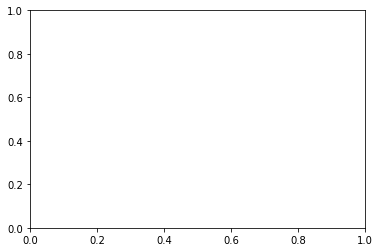

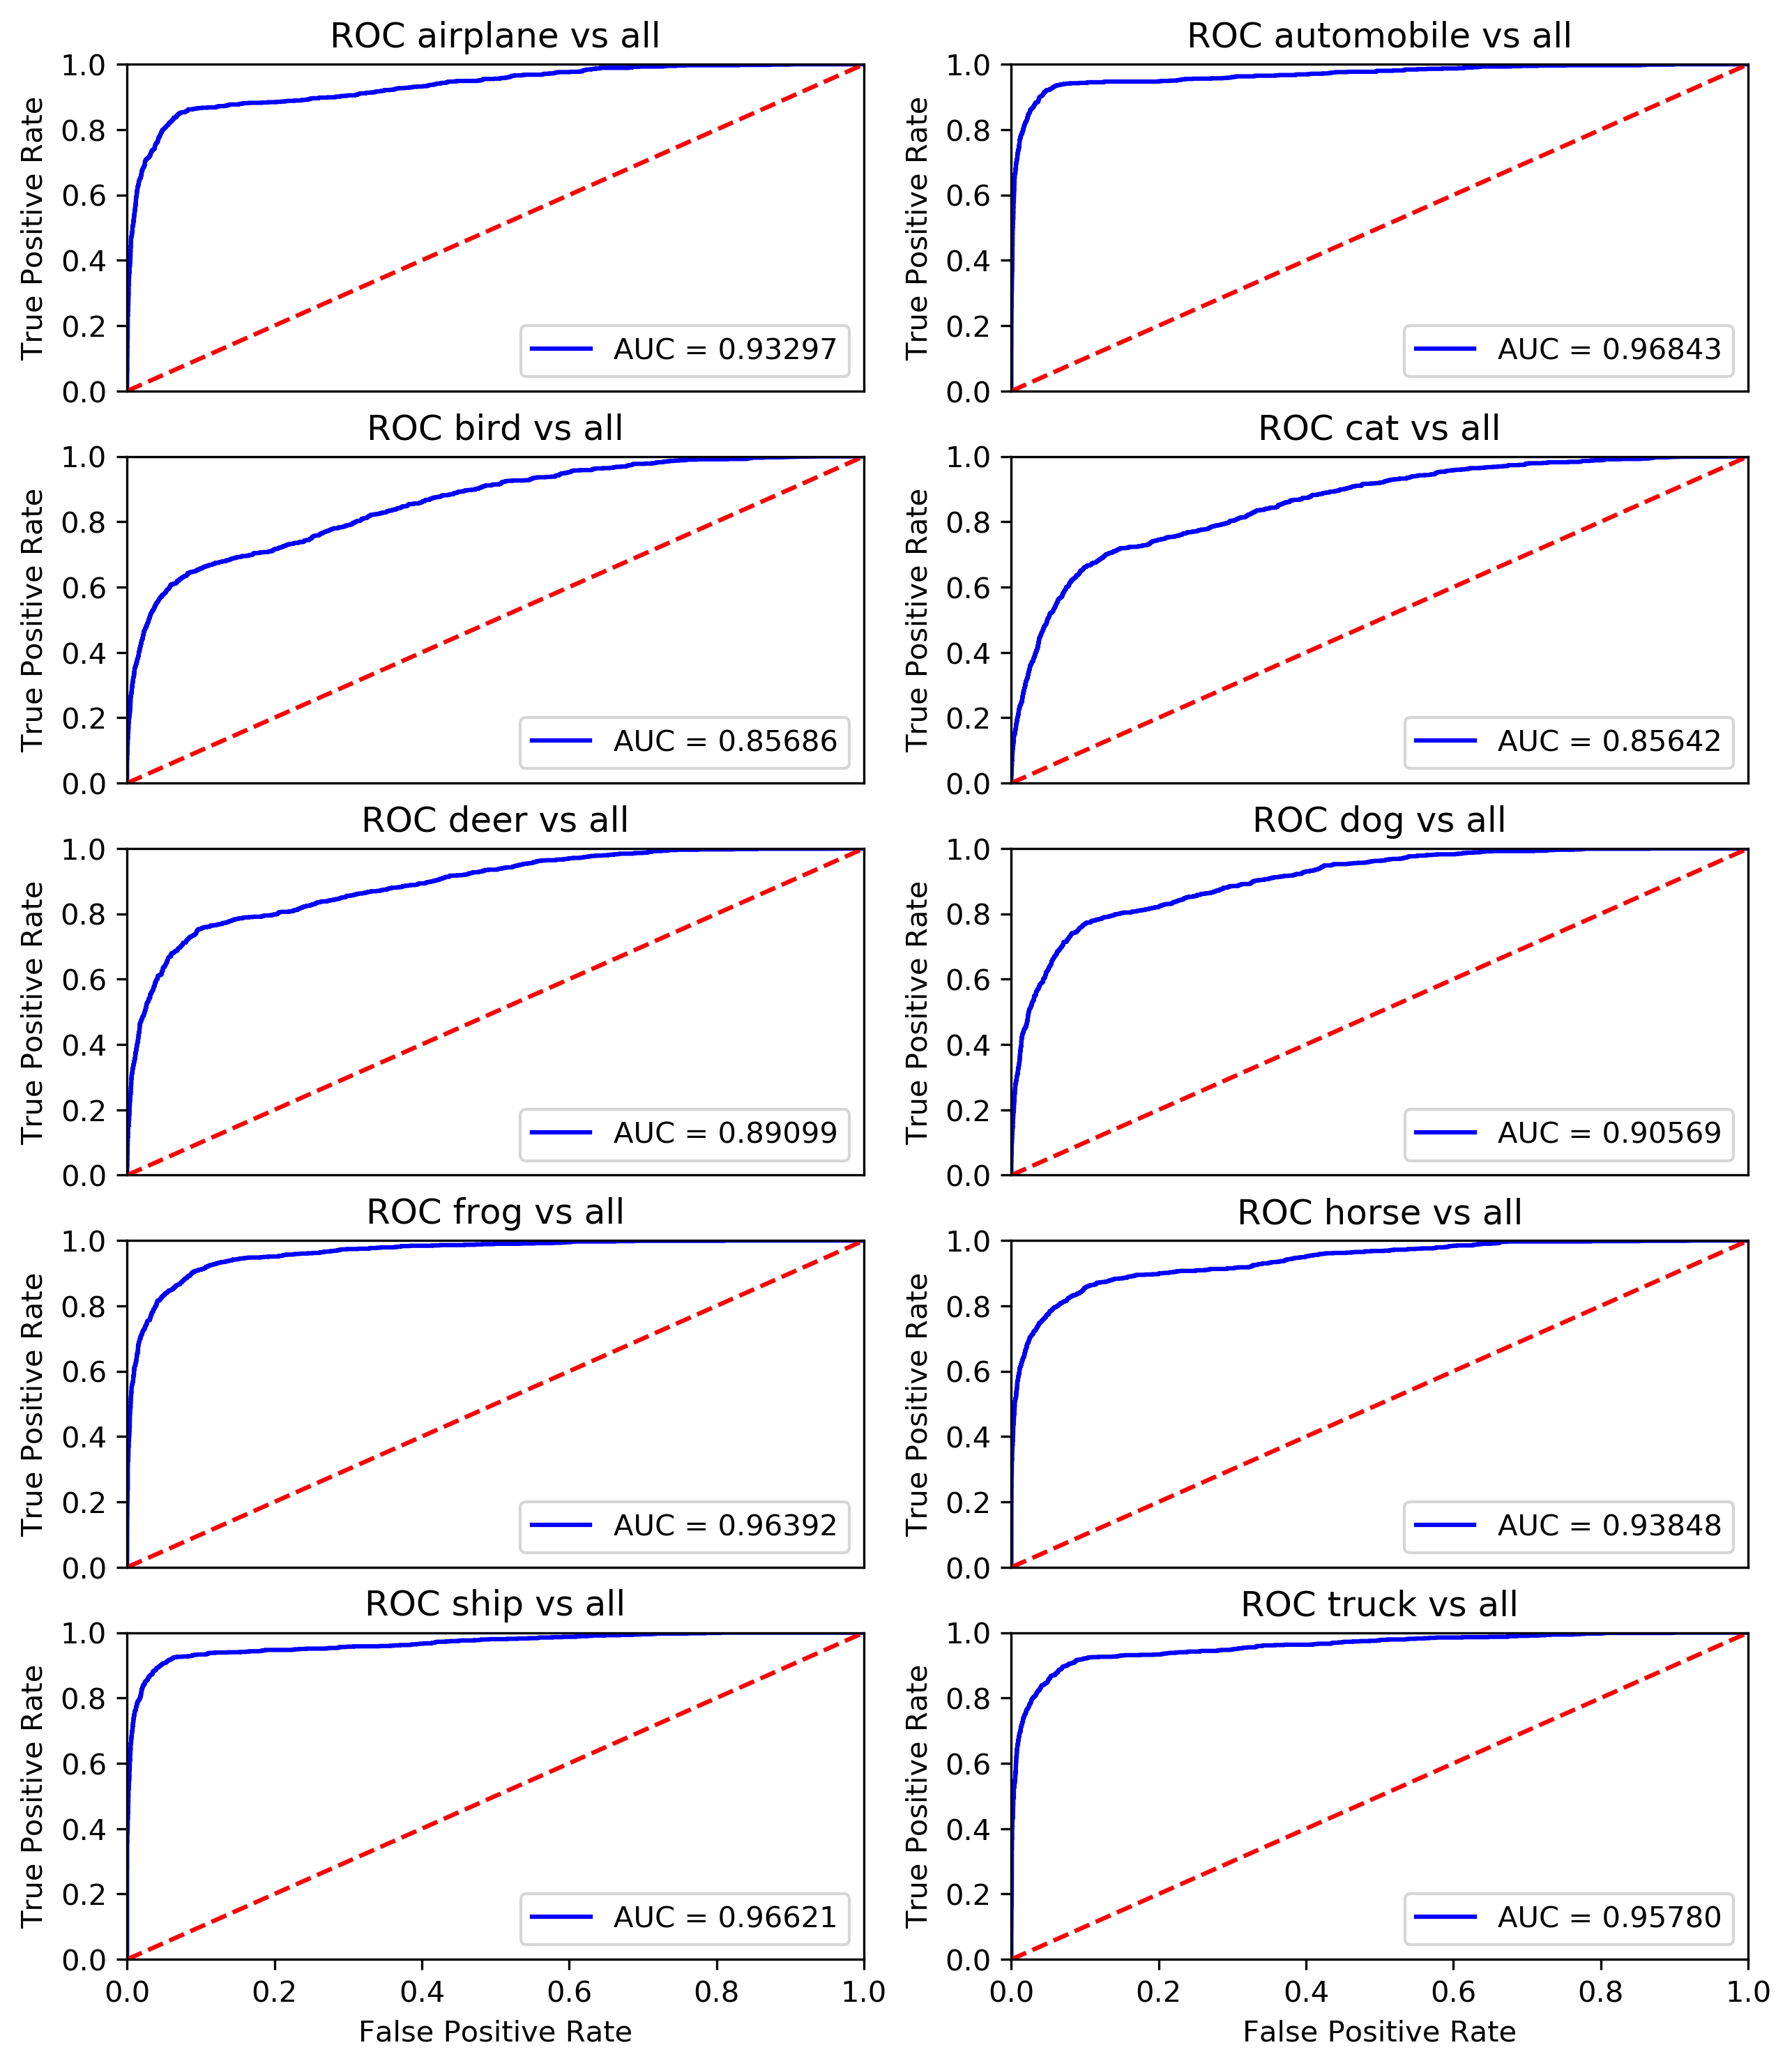

In [10]:
get_roc(best_model, dataloaders, class_names, 'cnnint')

In [14]:
import importlib
import my_nn_functions
importlib.reload(my_nn_functions)

<module 'my_nn_functions' from '/home/pitrosk/notebooks/final/my_nn_functions.py'>

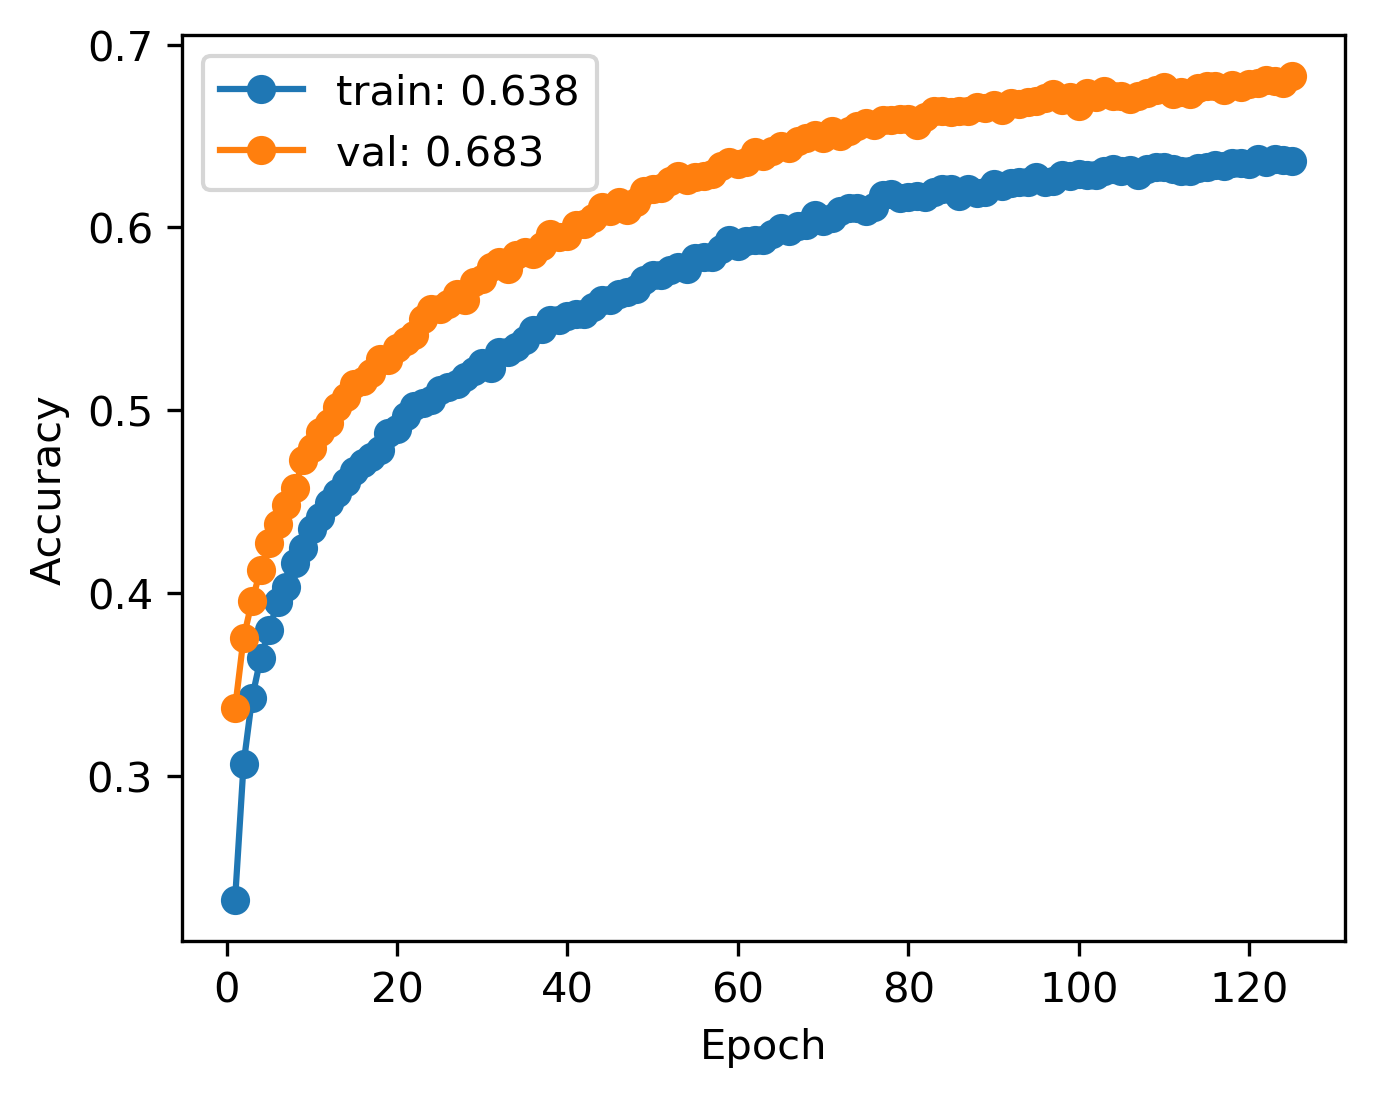

In [15]:
my_nn_functions.plot_history(acc_hist, 'Accuracy', 'cnnint')

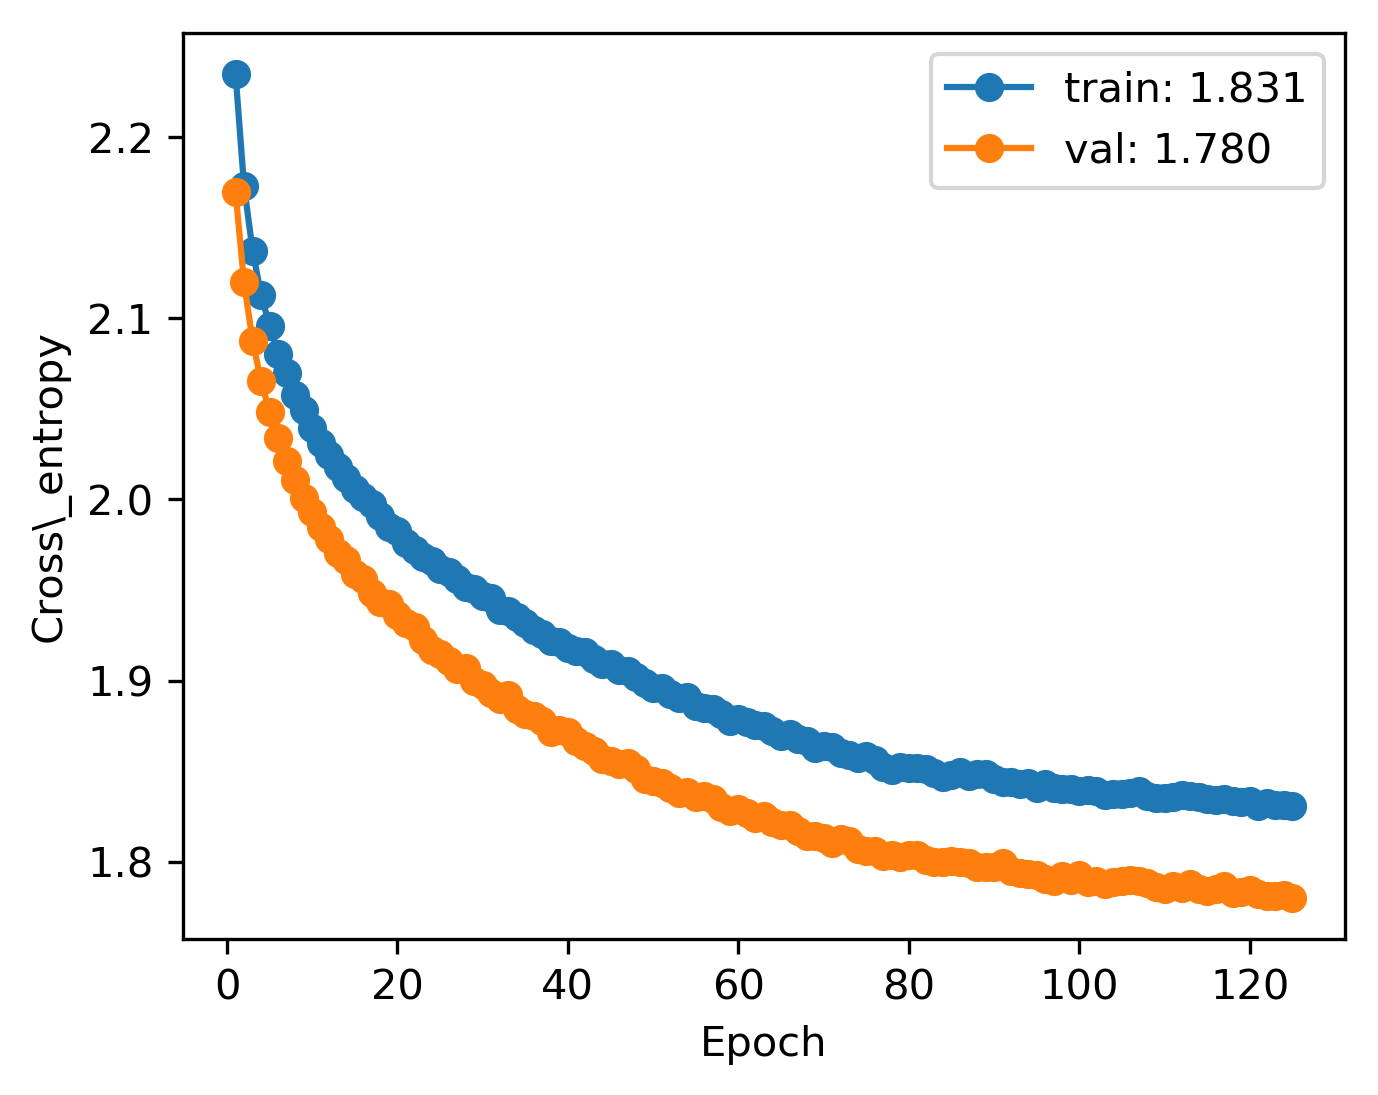

In [12]:
plot_history(loss_hist, 'Cross\_entropy', 'cnnint')